In [27]:
import pandas as pd
from math import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Traitement du dataset d'entrainement et du dataset de travail

In [2]:
df1=pd.read_csv("Star3642_balanced.csv") #data d'entrainements

In [149]:
encoder=LabelEncoder()
df1["SpType"]=encoder.fit_transform(df1["SpType"]) #on transforme SpType en chiffres
Y=df1["TargetClass"] 
X=df1[["Vmag","Plx","e_Plx","B-V","SpType"]]
#X["SpType"]=encoder.fit_transform(X["SpType"])

In [9]:
X

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,5.99,13.73,0.58,1.318,522,16.678352
1,8.70,2.31,1.29,-0.045,99,15.518060
2,5.77,5.50,1.03,0.855,337,14.471813
3,6.72,5.26,0.74,-0.015,150,15.324928
4,8.76,13.44,1.16,0.584,293,19.401997
...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,515,14.856089
3638,8.29,6.38,1.00,0.408,208,17.314104
3639,6.11,2.42,0.79,1.664,539,13.029078
3640,7.94,4.94,2.90,0.210,53,16.408636


In [152]:
df2=pd.read_csv("Star9999_raw.csv") #Data que l'on veut traiter
df2=df2.drop("Unnamed: 0",axis=1) #On enlève la colonne d'index



#On change les types des variables en float
df3=df2[["Vmag","Plx","e_Plx","B-V"]].astype("float16")
df2[["Vmag","Plx","e_Plx","B-V"]]=df3[["Vmag","Plx","e_Plx","B-V"]]

df2=df2.dropna(axis=0)


In [153]:
df2

,Vmag,Plx,e_Plx,B-V,SpType
0,9.101562,3.539062,1.389648,0.481934,366
1,9.273438,21.906250,3.099609,0.999023,727
2,6.609375,2.810547,0.629883,-0.018997,253
3,8.062500,7.750000,0.970215,0.370117,310
4,8.546875,2.869141,1.110352,0.901855,575
...,...,...,...,...,...
9674,8.453125,-0.930176,1.129883,1.404297,738
9675,7.839844,4.261719,1.000000,1.139648,674
9676,9.382812,3.609375,1.360352,0.506836,445
9677,7.640625,4.750000,0.970215,0.075012,39


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2) #On crée notre datasets

# Essai pour un KNeighborsClassifier

In [154]:
#On fait un test
model=KNeighborsClassifier(n_neighbors=20) #on entraine un modèle de KNeighbirsClassifier avec 20 voisins
model.fit(X_train,Y_train)
model.score(X_test,Y_test) #On regarde son score

0.9205479452054794

In [155]:
#On détermine quel nombre de voisins est optimal
model1=KNeighborsClassifier()
k=np.arange(1,50)
train_score, val_score=validation_curve(model1,X,Y,'n_neighbors',k,cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


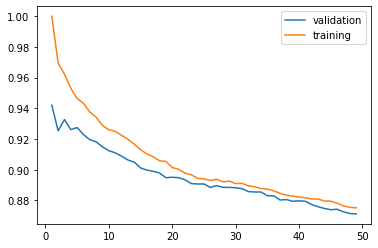

In [156]:
plt.plot(k,val_score.mean(axis=1),label="validation")
plt.plot(k,train_score.mean(axis=1),label="training")
plt.legend()

On prend donc n_neightbors=10 pour ne pas overfitter ni unerfitter

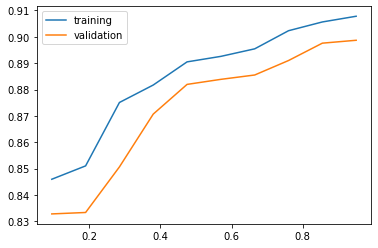

In [159]:
N,train_score,val_score=learning_curve(model,X,Y,train_sizes=np.linspace(0.1,1,10),cv=20)
plt.plot(N/len(X),train_score.mean(axis=1),label="training")
plt.plot(N/len(X),val_score.mean(axis=1),label="validation")
plt.legend()

On voit qu'on pourrait avoir de meilleurs résultats si nous avions plus de données d'entrainements, on va donc prendre un test size égal à 0.1 pour ne pas overfitter sur le trainset

In [167]:
model=KNeighborsClassifier(n_neighbors=10) #on entraine un modèle de KNeighbirsClassifier avec 20 voisins
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)
model.fit(X_train,Y_train)
KNN_score=model.score(X_test,Y_test)

# Essai pour une régression Logistique

In [163]:
LR_model = LogisticRegression(max_iter=1000) #on itère 150 fois et non pas 100 car 100 itérations ne permettent pas d'atteindre le minimum de la fonction de cout
LR_model.fit(X_train, Y_train)
LR_score=LR_model.score(X_test,Y_test)

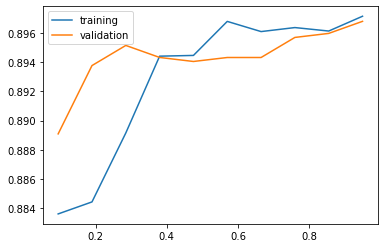

In [72]:
N,train_score,val_score=learning_curve(LR_model,X,Y,train_sizes=np.linspace(0.1,1,10),cv=20)
plt.plot(N/len(X),train_score.mean(axis=1),label="training")
plt.plot(N/len(X),val_score.mean(axis=1),label="validation")
plt.legend()

On voit que si nous avions plus de données,nous pourrions avoir de meilleurs résultats

# Essai de SVC

In [164]:
clf = svm.SVC()
clf.fit(X_train,Y_train)
svc_score=clf.score(X_test,Y_test)

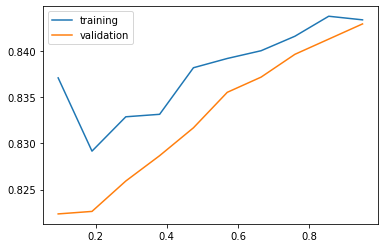

In [74]:
N,train_score,val_score=learning_curve(clf,X,Y,train_sizes=np.linspace(0.1,1,10),cv=20)
plt.plot(N/len(X),train_score.mean(axis=1),label="training")
plt.plot(N/len(X),val_score.mean(axis=1),label="validation")
plt.legend()

# Random Forest

In [165]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, Y_train)
rf_score=rf.score(X_test,Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_estimators, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


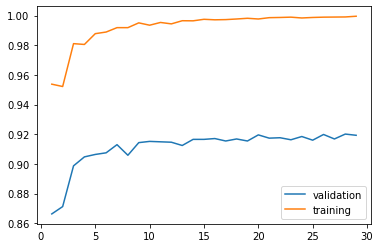

In [151]:
k=np.arange(1,30)
train_score, val_score=validation_curve(rf,X,Y,'n_estimators',k,cv=5)
plt.plot(k,val_score.mean(axis=1),label="validation")
plt.plot(k,train_score.mean(axis=1),label="training")
plt.legend()

On prend donc 20 estimateurs pour avoir une meilleure prédiction

In [166]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, Y_train)
rf_score=rf.score(X_test,Y_test)

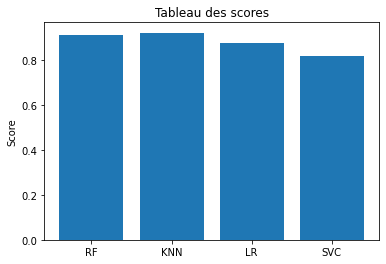

In [171]:
plt.bar(["RF","KNN","LR","SVC"],[rf_score,KNN_score,LR_score,svc_score])
plt.ylabel("Score")
plt.title("Tableau des scores")
plt.show()

On utilse le modle de KNN car il est plus précis

# Prédiction 

In [172]:
df2["TargetClass"]=model.predict(df2)

In [173]:
df2.to_csv("Starfinie_raw.csv")